In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading the dataset
Employee_evaluation=pd.read_csv('Employee promotion evaluation.csv')

#  DATA PRE-PROCESSING

In [3]:
#Previewing the first 5 rows
Employee_evaluation.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,promotion
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
#Previewing the last 5 rows
Employee_evaluation.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,promotion
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [5]:
#Viewing the rows and features
Employee_evaluation.shape

(54808, 13)

In [6]:
#viewing the statistical summary of the dataset
Employee_evaluation.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,promotion
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
#viewing the summary of the dataframe
Employee_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  promotion             54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [8]:
#checking for null values
Employee_evaluation.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
promotion                  0
dtype: int64

In [9]:
# Fill missing values in 'education', 'previous_year_rating', and 'avg_training_score' columns
# with the mode (most frequent value) of each respective column

Employee_evaluation["education"].fillna(value=Employee_evaluation['education'].mode()[0],inplace=True)
Employee_evaluation["previous_year_rating"].fillna(value=Employee_evaluation['previous_year_rating'].mode()[0],inplace=True)
Employee_evaluation["avg_training_score"].fillna(value=Employee_evaluation['avg_training_score'].mode()[0],inplace=True)

In [10]:
#checking for null values after filling

Employee_evaluation.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
promotion               0
dtype: int64

In [11]:
#viewing the data type of each feature
Employee_evaluation.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
promotion                 int64
dtype: object

In [12]:
# Display descriptive statistics for object-type columns in the Employee_evaluation DataFrame
Employee_evaluation.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,54808,3,Bachelor's,39078
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


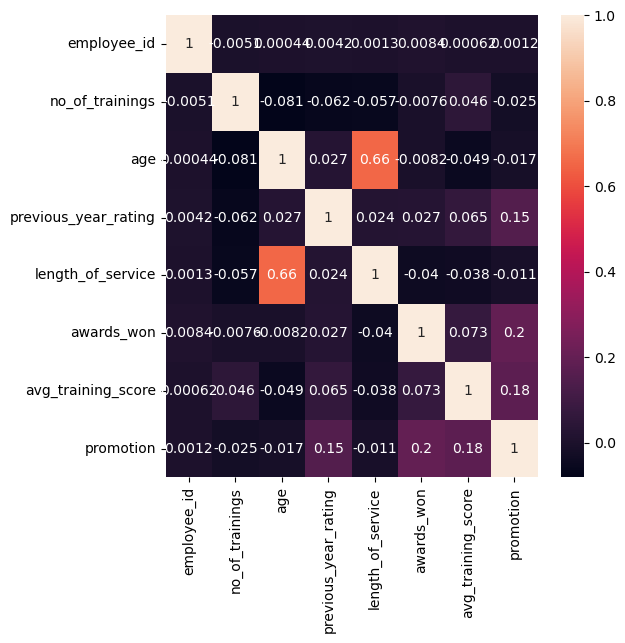

In [13]:
# Create a correlation matrix for numeric columns in the Employee_evaluation DataFrame using a heatmap to display the strength and direction of relationships

plt.figure(figsize=(6, 6))
numeric_columns = Employee_evaluation.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

DATA VISUALIZATION

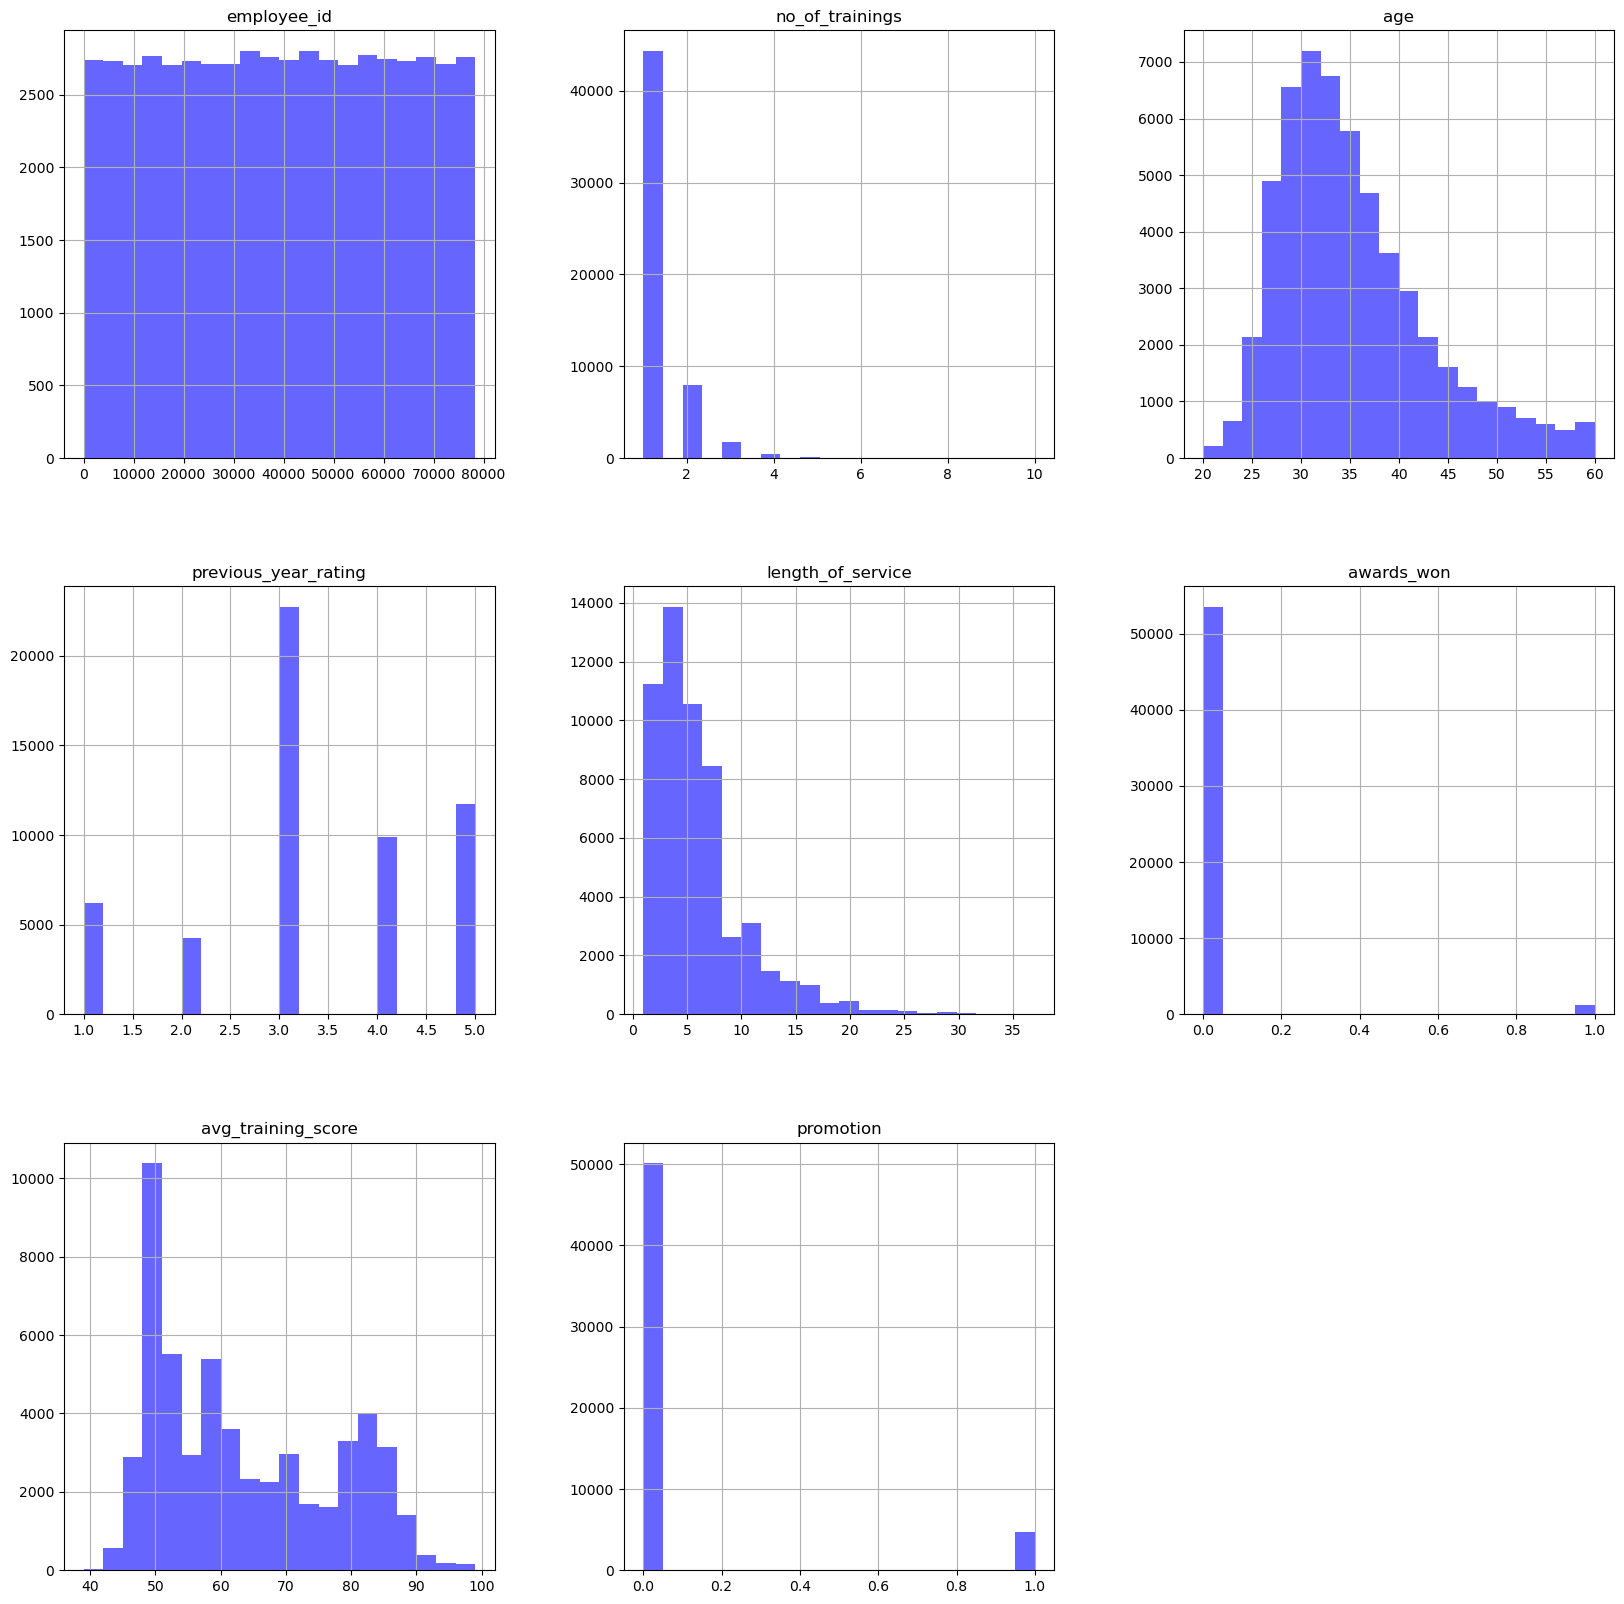

In [14]:
# Visualizing the distribution of numeric features in the Employee_evaluation DataFrame using histograms,

Employee_evaluation.hist(figsize=(20, 20), bins=20, color="blue", alpha=0.6) # alpha for transparency
plt.title("Numeric Features Distribution")
plt.show()

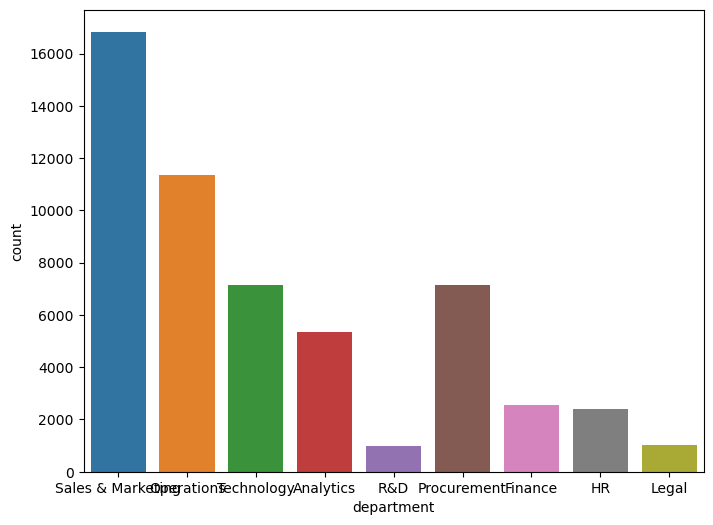

In [15]:
#Visualize the distribution of employees across different departments using a count plot

plt.figure(figsize=(8, 6)) 
sns.countplot(data=Employee_evaluation, x="department")
plt.show()

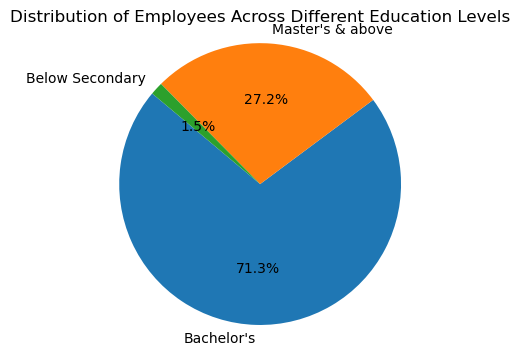

In [16]:

# Count the number of employees in each education level
education_counts = Employee_evaluation['education'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees Across Different Education Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


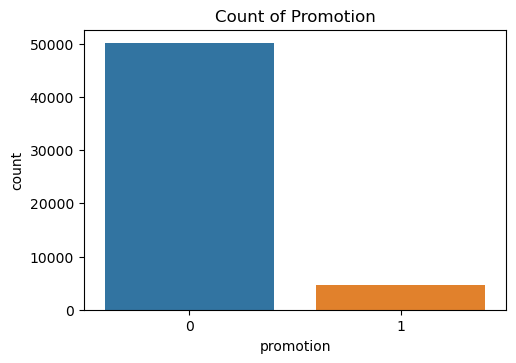

In [17]:
# Visualize the count of promotion using a count plot,

plt.figure(figsize=(12, 8))  
plt.subplot(2, 2, 1)
sns.countplot(data=Employee_evaluation, x='promotion')
plt.title('Count of Promotion')
plt.show()

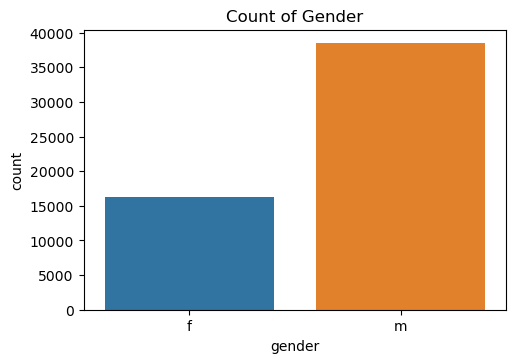

In [19]:
# Visualizing the count of employees by gender using a count plot
plt.figure(figsize=(12, 8))  
plt.subplot(2, 2, 1)
sns.countplot(data=Employee_evaluation, x='gender')
plt.title('Count of Gender')
plt.show()

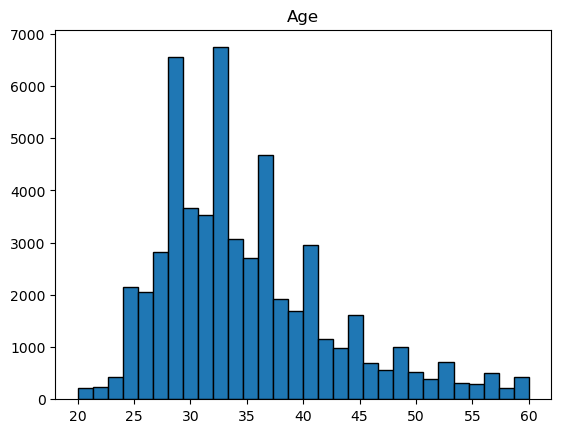

In [20]:
#Visualizing the distribution of employee ages using a histogram

plt.hist(Employee_evaluation['age'], bins=30,edgecolor='black')
plt.title('Age')
plt.show()


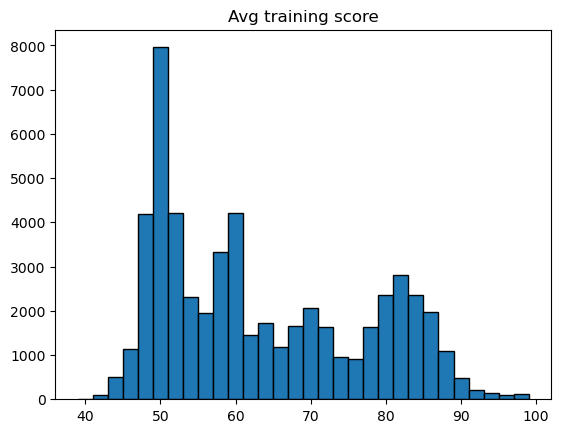

In [21]:
# Visualizing the distribution of employee Avg training score using a histogram,

plt.hist(Employee_evaluation['avg_training_score'], bins=30,edgecolor='black')
plt.title('Avg training score')
plt.show()

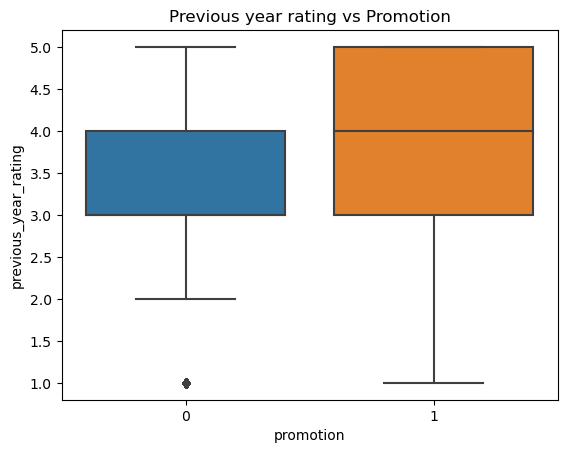

In [22]:
#Boxplot previous yeat rating vs promotion classification
sns.boxplot(x='promotion', y='previous_year_rating', data=Employee_evaluation)
plt.title('Previous year rating vs Promotion')
plt.show()

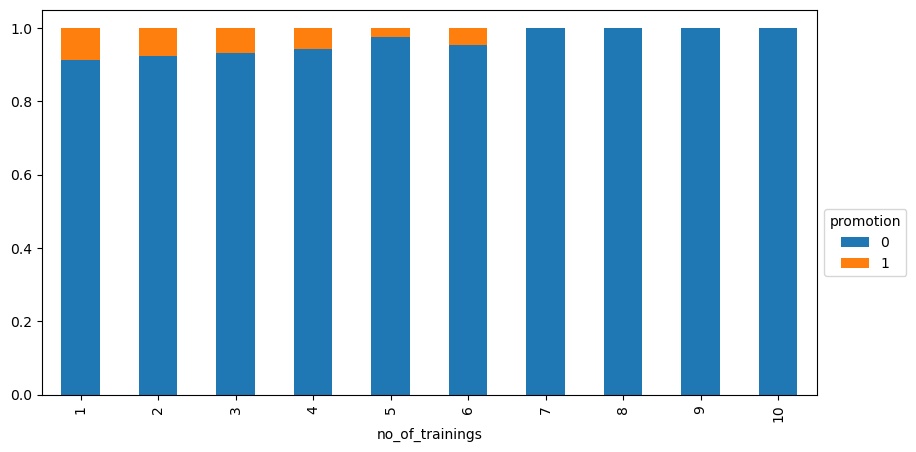

In [23]:
# Calculate and plot  the cross-tabulation of 'no_of_trainings' and 'promotion'

plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(Employee_evaluation.no_of_trainings,Employee_evaluation.promotion,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='promotion',loc='upper left',bbox_to_anchor=(1, 0.5))


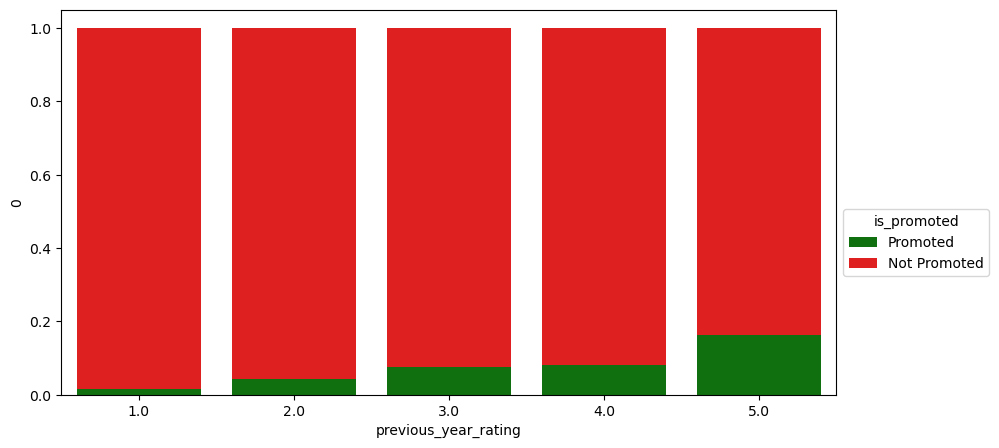

In [24]:
plt.figure(figsize=(10, 5))

# Calculate the proportion of promotions for each previous_year_rating
score_bin = pd.crosstab(Employee_evaluation.previous_year_rating, Employee_evaluation.promotion, normalize='index')

# Plot the stacked bar plot using seaborn
sns.barplot(x=score_bin.index, y=score_bin[1], color='green', label='Promoted')
sns.barplot(x=score_bin.index, y=score_bin[0], color='red', bottom=score_bin[1], label='Not Promoted')

plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

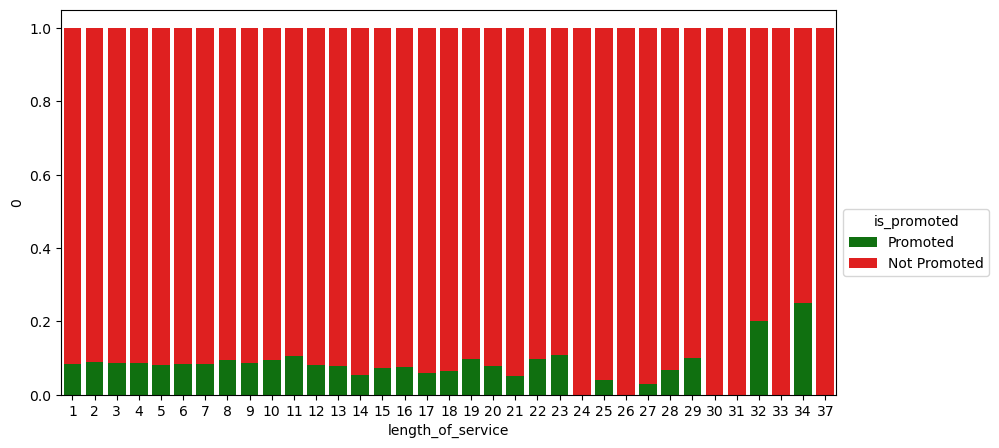

In [25]:
plt.figure(figsize=(10, 5))

# Calculate the proportion of promotions for each length_of_service
score_bin = pd.crosstab(Employee_evaluation.length_of_service, Employee_evaluation.promotion, normalize='index')

# Plot the stacked bar plot using seaborn
sns.barplot(x=score_bin.index, y=score_bin[1], color='green', label='Promoted')
sns.barplot(x=score_bin.index, y=score_bin[0], color='red', bottom=score_bin[1], label='Not Promoted')

plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

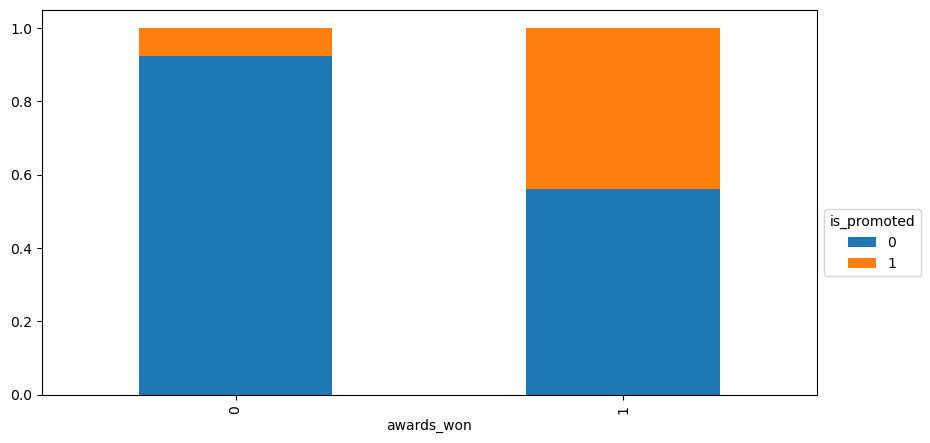

In [26]:
# generating a stacked bar plot showing the proportion of promotions based on whether the employees have won awards or not.

plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(Employee_evaluation.awards_won,Employee_evaluation.promotion,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

<Figure size 200x200 with 0 Axes>

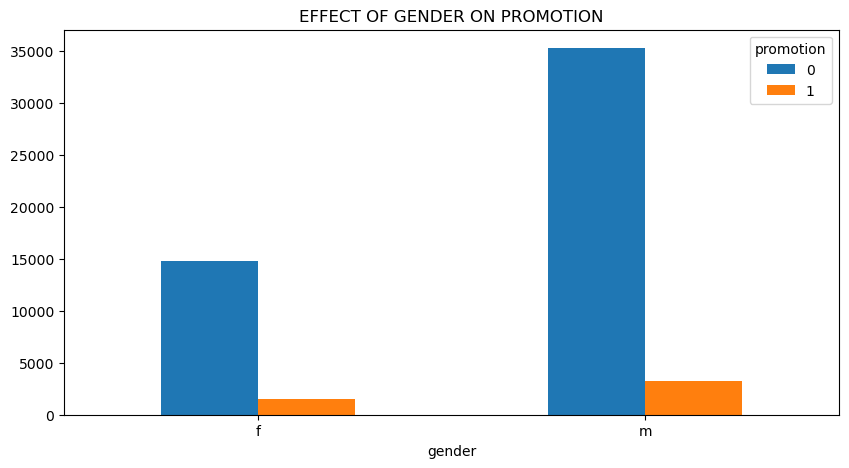

In [27]:

#generating a bar plot showing the distribution of promotions across different genders. 
plt.figure(figsize=(2, 2))
x = pd.crosstab(Employee_evaluation['gender'], Employee_evaluation['promotion'])
x.plot.bar()
plt.xticks(rotation='horizontal')
plt.title('EFFECT OF GENDER ON PROMOTION');

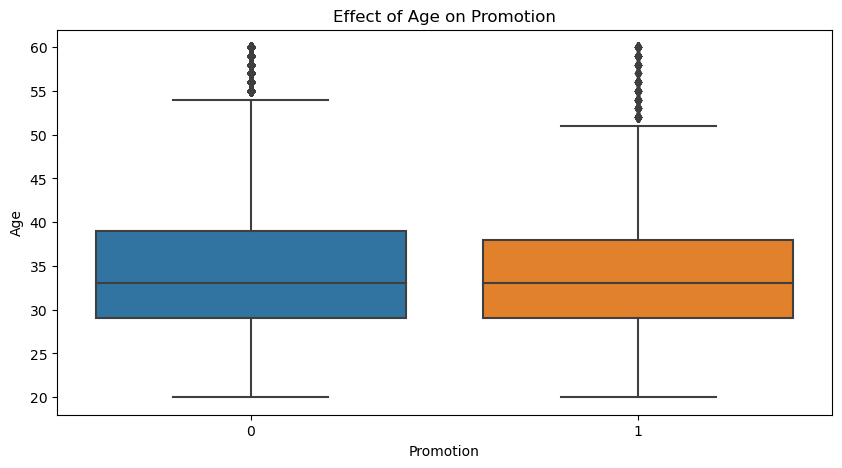

In [28]:
# Box plot showing the effect of age on promotion
sns.boxplot(x='promotion', y='age', data=Employee_evaluation)
plt.title('Effect of Age on Promotion')
plt.xlabel('Promotion')
plt.ylabel('Age')
plt.show()


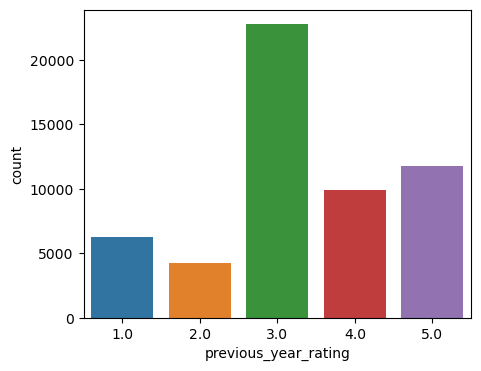

In [29]:
plt.figure(figsize=(5, 4))
sns.countplot(data=Employee_evaluation, x="previous_year_rating")
plt.show()


In [30]:
# Droping 'employee_id' column because its not needed for the model
Employee_evaluation = Employee_evaluation.drop('employee_id', axis=1)

In [31]:
# Identifying  categorical columns in the test dataset
test_cat_columns = Employee_evaluation.select_dtypes(include=['object']).columns

# Applying one-hot encoding to categorical columns, dropping the first level to avoid multicollinearity
test_encoded = pd.get_dummies(Employee_evaluation, drop_first=True, columns=test_cat_columns)

# Converting boolean values to integers (0 and 1)
test_encoded = test_encoded.astype(int)

# Display the first few rows of the encoded test dataset
test_encoded.head()



,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,promotion,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,0,49,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5,4,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3,7,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1,10,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3,2,0,73,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# BALANCING THE DATASET

In [32]:
# Separate features (X) and the target variable (y)
X = test_encoded.drop(columns=['promotion'])  #the target column is 'promotion'
y = test_encoded['promotion']  #the target column is 'promotion'

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['promotion'] = y_resampled

# Check the class distribution after applying SMOTE
print(resampled_df['promotion'].value_counts())


promotion
0    50140
1    50140
Name: count, dtype: int64


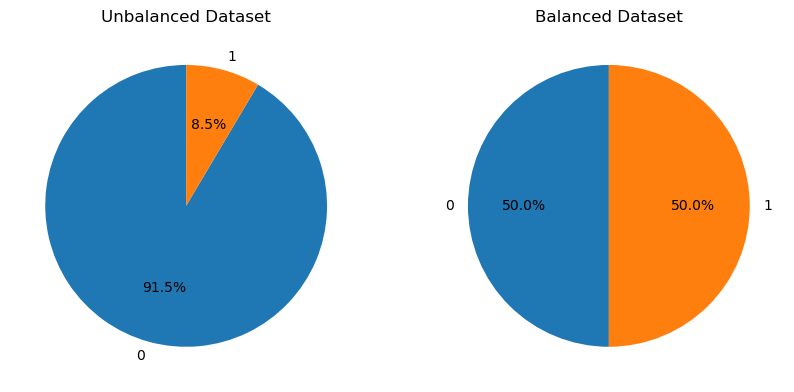

In [33]:
# Plotting Class distribution of balanced and unbalanced dataset
unbalanced_counts = test_encoded['promotion'].value_counts()

balanced_counts = resampled_df['promotion'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(unbalanced_counts, labels=unbalanced_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Unbalanced Dataset')

axes[1].pie(balanced_counts, labels=balanced_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Balanced Dataset')

plt.show()


# MODEL BUILDING- LOGISTIC REGRESSION

In [34]:
# Separate features (X) and target variable (y) from the resampled data
X_resampled = resampled_df.drop(columns=['promotion'])
y_resampled = resampled_df['promotion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (80224, 52) (80224,)
Testing set shape: (20056, 52) (20056,)


In [35]:
#standardizing the features in the training and testing datasets using the StandardScaler.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [36]:
# Instantiate the logistic regression model with a higher max_iter value
logistic_regression = LogisticRegression(max_iter=10000)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing data:", accuracy_test)

# Print classification report
print("Classification Report on testing data:")
print(classification_report(y_test, y_pred_test))

# Print confusion matrix
print("Confusion Matrix on testing data:")
print(confusion_matrix(y_test, y_pred_test))


Accuracy on testing data: 0.8788392500997207
Classification Report on testing data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10197
           1       0.92      0.83      0.87      9859

    accuracy                           0.88     20056
   macro avg       0.88      0.88      0.88     20056
weighted avg       0.88      0.88      0.88     20056

Confusion Matrix on testing data:
[[9487  710]
 [1720 8139]]


In [38]:
# Calculate training accuracy
train_accuracy = logistic_regression.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = logistic_regression.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

print("Training Accuracy:", train_accuracy * 100, "%")
print("Testing Accuracy:", test_accuracy * 100, "%")



Training Accuracy: 0.8797242720382927
Testing Accuracy: 0.8788392500997207
Training Accuracy: 87.97242720382927 %
Testing Accuracy: 87.88392500997207 %


In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_pred_test, y_test)
print("Accuracy = ", accuracy * 100, "%")

# Calculate F1 score
f1 = f1_score(y_pred_test, y_test)
print("F1 score = ", f1 * 100, "%")

# Calculate recall
recall = recall_score(y_pred_test, y_test)
print("Recall = ", recall * 100, "%")

# Calculate precision
precision = precision_score(y_pred_test, y_test)
print("Precision = ", precision * 100, "%")

Accuracy =  87.88392500997207 %
F1 score =  87.01090442591405 %
Recall =  91.9764945191547 %
Precision =  82.55401156303884 %


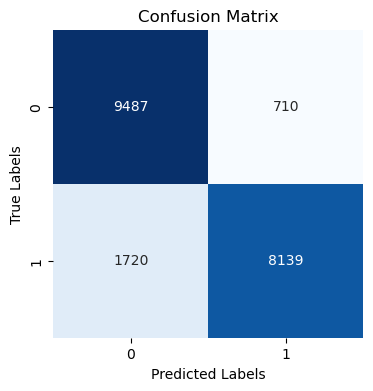

In [40]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Splitting the True and Predicted Values into Male and Female Groups

In [41]:
#converting gender column to numeric values
Employee_evaluation["gender"].replace({'m': 1, 'f': 0}, inplace=True)


In [42]:
# Define the protected attribute and its categories
PROTECTED = "gender"
MEN = 1  # Category representing men
WOMEN = 0  # Category representing women

# Count the occurrences of each category in the 'gender' column
gender_dist = Employee_evaluation[PROTECTED].value_counts()
print(gender_dist)

# Get the indices of rows where 'gender' is categorized as men
men_indices = Employee_evaluation[Employee_evaluation[PROTECTED] == MEN].index
print(men_indices, "No of Men =", men_indices.size)

# Get the indices of rows where 'gender' is categorized as women
women_indices = Employee_evaluation[Employee_evaluation[PROTECTED] == WOMEN].index
print(women_indices, "No of Women =", women_indices.size)



gender
1    38496
0    16312
Name: count, dtype: int64
Index([    1,     2,     3,     4,     5,     7,     8,     9,    10,    12,
       ...
       54794, 54795, 54796, 54797, 54800, 54802, 54803, 54805, 54806, 54807],
      dtype='int64', length=38496) No of Men = 38496
Index([    0,     6,    11,    22,    32,    37,    41,    45,    46,    49,
       ...
       54779, 54780, 54781, 54786, 54788, 54790, 54798, 54799, 54801, 54804],
      dtype='int64', length=16312) No of Women = 16312


In [43]:
# Ensure indices are within bounds
men_indices = [idx for idx in men_indices if idx < len(y_test)]
women_indices = [idx for idx in women_indices if idx < len(y_test)]

#Extract the actual outcomes for the corresponding groups
y_actual_m = [y_test.values[i] for i in men_indices]
y_actual_f = [y_test.values[i] for i in women_indices]

# Print the actual outcomes for male and female groups
print("Actual outcomes for Male group:", y_actual_m)
print("Actual outcomes for Female group:", y_actual_f)


Actual outcomes for Male group: [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1

In [44]:
# Extract the actual and predicted outcomes for the two groups
y_pred_test = logistic_regression.predict(X_test)

# Using the indices to split Y_test into two groups (one for Male and one for Female)
y_test_m = [y_test.values[i] for i in men_indices]
y_test_f = [y_test.values[i] for i in women_indices]
y_pred_m = [y_pred_test[i] for i in men_indices]
y_pred_f = [y_pred_test[i] for i in women_indices]

# Computing the confusion matrices (cm_m and cm_f)
cm_m = confusion_matrix(y_test_m, y_pred_m)
cm_f = confusion_matrix(y_test_f, y_pred_f)

# Calculating performance metrics for Male group
accuracy_m = accuracy_score(y_test_m, y_pred_m)
positive_rate_m = cm_m[1, 1] / (cm_m[1, 0] + cm_m[1, 1])
recall_m = cm_m[1, 1] / (cm_m[1, 1] + cm_m[0, 1])

# Calculating performance metrics for Female group
accuracy_f = accuracy_score(y_test_f, y_pred_f)
positive_rate_f = cm_f[1, 1] / (cm_f[1, 0] + cm_f[1, 1])
recall_f = cm_f[1, 1] / (cm_f[1, 1] + cm_f[0, 1])

# Print the performance metrics
print("Male group:")
print("Accuracy:", accuracy_m)
print("Positive Rate:", positive_rate_m)
print("Recall:", recall_m)

print("\nFemale group:")
print("Accuracy:", accuracy_f)
print("Positive Rate:", positive_rate_f)
print("Recall:", recall_f)



Male group:
Accuracy: 0.8775726713346064
Positive Rate: 0.8219940094137783
Recall: 0.9226705091258406

Female group:
Accuracy: 0.8818658103768802
Positive Rate: 0.8342696629213483
Recall: 0.9127929312331925


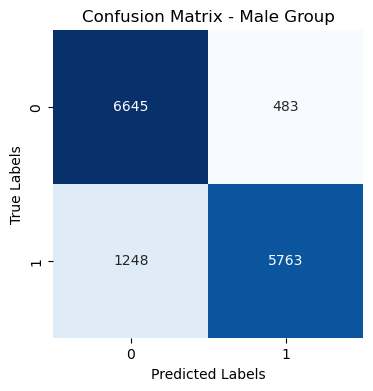

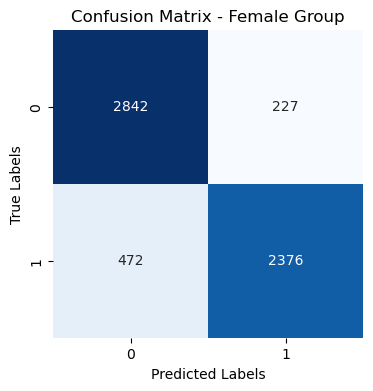

In [45]:
# Plot confusion matrix for Male group
plt.figure(figsize=(4, 4))
sns.heatmap(cm_m, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Male Group')
plt.show()

# Plot confusion matrix for Female group
plt.figure(figsize=(4, 4))
sns.heatmap(cm_f, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Female Group')
plt.show()


#  Checking for bias

In [46]:
# Threshold for all criteria
threshold = 0.5

# Accuracies for male and female groups
accuracy_male = 0.8775726713346064
accuracy_female = 0.8818658103768802

# Calculating the absolute difference between accuracies
accuracy_difference = abs(accuracy_male - accuracy_female)

# Checking if the difference exceeds the threshold
if accuracy_difference > threshold:
    print("The model shows potential bias in predictions between male and female groups based on accuracy.")
else:
    print("The model does not show bias in predictions between male and female groups based on accuracy.")

# Positive rates for male and female groups
positive_rate_male = 0.8219940094137783
positive_rate_female = 0.8342696629213483

# Calculating the absolute difference between positive rates
positive_rate_difference = abs(positive_rate_male - positive_rate_female)

# Checking if the difference exceeds the threshold
if positive_rate_difference > threshold:
    print("The model shows potential bias in predictions between male and female groups based on positive rate (demographic parity).")
else:
    print("The model does not show bias in predictions between male and female groups based on positive rate (demographic parity).")

# Recall rates for male and female groups
recall_male = 0.9226705091258406
recall_female = 0.9127929312331925

# Calculating the absolute difference between recalls
recall_difference = abs(recall_male - recall_female)

# Checking if the difference exceeds the threshold
if recall_difference > threshold:
    print("The model shows potential bias in predictions between male and female groups based on recall (equal opportunity).")
else:
    print("The model does not show bias in predictions between male and female groups based on recall (equal opportunity).")


The model does not show bias in predictions between male and female groups based on accuracy.
The model does not show bias in predictions between male and female groups based on positive rate (demographic parity).
The model does not show bias in predictions between male and female groups based on recall (equal opportunity).
